## Imports

In [4]:
import re

from pprint import pprint

import matplotlib.pyplot as plt
import numpy as np

from cltk.corpus.latin import latinlibrary
from cltk.tokenize.sentence import TokenizeSentence
from cltk.tokenize.word import WordTokenizer

## CLTK Tools

In [5]:
word_tokenizer = WordTokenizer('latin')
sent_tokenizer = TokenizeSentence('latin')

## Process Files

In [113]:
files = latinlibrary.fileids()
cicero_files = [file for file in files if 'cicero/' in file]
cicero_files = [file for file in cicero_files if 'consulatu.txt' not in file]
cicero_files = [file for file in cicero_files if 'divinatione.txt' not in file]
cicero_files = [file for file in cicero_files if 'nd.txt' not in file]
cicero_raw = latinlibrary.raw(cicero_files)

## Function for preprocessing texts

In [114]:
# Preprocess texts
def preprocess(text):    
    
    text = text.lower()
    
    text= re.sub(r'&lt;','<',text)
    text= re.sub(r'&gt;','>',text)    
        
    punctuation ="\"#$%&\'()*+,-/:;<=>@[\]^_`{|}~"
    translator = str.maketrans({key: " " for key in punctuation})
    text = text.translate(translator)
    
    translator = str.maketrans({key: " " for key in '0123456789'})
    text = text.translate(translator)
    
    #from cltk.stem.latin.j_v import JVReplacer
    #replacer = JVReplacer()
    #text = replacer.replace(text)

    remove_list = [r'\bthe latin library\b', r'\bthe classics page\b', r'\bcicero\s+?$'] 
    for pattern in remove_list:
        text = re.sub(pattern, '', text)
    
    return text

## Process Texts

In [115]:
# Assemble a list of all 140 of Cicero's texts
cicero_texts = [latinlibrary.raw(file) for file in cicero_files]
cicero_texts = [preprocess(text) for text in cicero_texts]

# Assemble a list of all 140 of Cicero's titles
cicero_titles = [text.split('\n')[0].strip() for text in cicero_texts]
cicero_titles = [title.split('cicero ',1)[-1].lower().strip() for title in cicero_titles]
cicero_titles = [title[:-1] if title.endswith('.') else title for title in cicero_titles]

In [72]:
def sent_count(text):
    sents = sent_tokenizer.tokenize(text)
    return(len(sents))

def word_count(text):
    words = word_tokenizer.tokenize(text)
    return(len(words))

def char_count(text):
    return len(text)

def syll_count(text):
    return sum(letter in 'aeiouy' for letter in text.lower())

def comp_word_count(text):
    words = text.split()
    comp_words = [word for word in words if syll_count(word) > 3]
    return len(comp_words)

In [10]:
def ari(text):
    c, w, s = char_count(text), word_count(text), sent_count(text)
    score = 4.71 * (c / w) + 0.5 * (w / s) - 21.43
    return score

In [11]:
def dalechall(sentence): 
    pass

In [80]:
def gunningfog(text):
    w, s, cw = word_count(text), sent_count(text), comp_word_count(text)
    score = 0.4 * ((w / s) + (100 * (cw / w)))
    return score

In [82]:
def fleschkincaid(text):
    w, s, sy = word_count(text), sent_count(text), syll_count(text)
    score = (0.39 * (w / s)) + (11.8 * (sy / w)) - 15.59
    return score

In [92]:
def coleman_liau(text):
    c, w, s = char_count(text), word_count(text), sent_count(text)
    cs, ss = (c / w) * 100, (s / w) * 100
    score = (0.0588 * cs) - (0.296 * ss) - 15.8
    return score

In [75]:
# Remove paragraphs less than 5 words long
cicero_paras = []

for text in cicero_texts:
    paras = text.split('\n')
    paras = [" ".join(para.split()) for para in paras]
    
    paras = [para for para in paras if len(para.split()) > 10]
    cicero_paras.append(paras)

In [116]:
aris = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    aris.append((cicero_titles[i],ari(text)))
    
           
aris.sort(key=lambda x: x[1])
pprint(aris[:5])               
pprint(aris[-5:])

[('ad atticum xiii', 8.518604266068955),
 ('ad atticum xii', 8.926175247389793),
 ('ad atticum xv', 9.316047349881217),
 ('ad familiares xiv', 10.041449138258397),
 ('ad atticum xvi', 10.302402547994994)]
[('de oratore iii', 26.79769587317343),
 ('de oratore ii', 27.304608303143894),
 ('post reditum ad quirites', 27.545054641341288),
 ('ad familiares i', 29.054788968318682),
 ('de oratore i', 31.029355209322325)]


In [117]:
cls = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    cls.append((cicero_titles[i],coleman_liau(text)))
    
           
cls.sort(key=lambda x: x[1])
pprint(cls[:5])               
pprint(cls[-5:])

[('ad atticum xiii', 12.441305222640182),
 ('ad atticum xii', 12.765881164477918),
 ('ad atticum xv', 13.234013271073973),
 ('ad familiares xiv', 13.876772616136918),
 ('ad atticum xvi', 14.132220566318928)]
[('in catilinam iv', 21.411002300361485),
 ('post reditum in senatu', 21.681293729372936),
 ('philippic xiv', 22.026980870529524),
 ('post reditum ad quirites', 22.117553384002893),
 ('de re publica iv', 22.825120772946857)]


In [91]:
fks = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    fks.append((cicero_titles[i],fleschkincaid(text)))
    
           
fks.sort(key=lambda x: x[1])
pprint(fks[:5])               
pprint(fks[-5:])

[('ad atticum xiii', 12.062110907623019),
 ('ad atticum xii', 12.620762069031635),
 ('ad atticum xu', 13.069341607274517),
 ('ad familiares xiu', 13.819059912193627),
 ('ad atticum xui', 14.10467706741623)]
[('de oratore iii', 28.58445522086347),
 ('de oratore ii', 28.88064235786842),
 ('post reditum ad quirites', 29.576402555099623),
 ('ad familiares i', 29.961710116191956),
 ('de oratore i', 32.08401680246587)]


In [81]:
gfs = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    gfs.append((cicero_titles[i],gunningfog(text)))
    
           
gfs.sort(key=lambda x: x[1])
pprint(gfs[:5])               
pprint(gfs[-5:])

[('ad atticum xiii', 9.918784033973177),
 ('ad atticum xii', 10.286776179177332),
 ('ad atticum xu', 10.695820430900305),
 ('ad atticum xi', 11.03469265653117),
 ('ad atticum xui', 11.390365158117806)]
[('de oratore iii', 23.96776189127348),
 ('de oratore ii', 24.333800391981914),
 ('post reditum ad quirites', 25.138624965335065),
 ('ad familiares i', 25.941739553969718),
 ('de oratore i', 27.42295161934555)]


[('de oratore iii', 26.79769587317343),
 ('de oratore ii', 27.304608303143894),
 ('post reditum ad quirites', 27.545054641341288),
 ('ad familiares i', 29.054788968318682),
 ('de oratore i', 31.029355209322325)]


In [16]:
# Length of work
lengths = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    tokens = word_tokenizer.tokenize(text)
    lengths.append((cicero_titles[i], len(tokens)))

lengths.sort(key=lambda x: x[1])
pprint(lengths[:5])
pprint(lengths[-5:])

[('de re publica iu', 207),
 ('de re publica u', 391),
 ('de lege agraria iii', 1346),
 ('philippic iu', 1462),
 ('de optimo genere oratorum', 1665)]
[('in uerrem ii', 20325),
 ('pro a. cluentio oratio', 22366),
 ('brutus', 26335),
 ('in uerrem ii', 26536),
 ('de oratore ii', 28132)]


In [17]:
# Unique words
uniques = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    tokens = word_tokenizer.tokenize(text)
    uniques.append((cicero_titles[i], len(set(tokens))))

uniques.sort(key=lambda x: x[1])
pprint(uniques[:5])
pprint(uniques[-5:])

[('de re publica iu', 170),
 ('de re publica u', 280),
 ('de lege agraria iii', 706),
 ('philippic iu', 764),
 ('de optimo genere oratorum', 808)]
[('pro a. cluentio oratio', 5670),
 ('in uerrem ii', 5694),
 ('in uerrem ii', 6236),
 ('brutus', 6646),
 ('de oratore ii', 7039)]


In [121]:
# Lexical diversity
lexdivs = []
lexdivs_tokens = []

for i, paras in enumerate(cicero_paras):
    text = "\n".join(paras)
    tokens = word_tokenizer.tokenize(text)
    lexdivs_tokens.append(tokens)
    lexdivs.append((cicero_titles[i], len(set(tokens)) / len(tokens)))

lexdivs.sort(key=lambda x: x[1])
pprint(lexdivs[:5])
pprint(lexdivs[-5:])

[('de inventione ii', 0.22596651943944598),
 ('ad familiares xiii', 0.2324374954967937),
 ('in verrem ii', 0.23500150738619235),
 ('de inventione i', 0.23911331839379807),
 ('de oratore ii', 0.2502132802502488)]
[('philippic ix', 0.5074370709382151),
 ('philippic iv', 0.5225718194254446),
 ('de lege agraria iii', 0.524517087667162),
 ('de re publica v', 0.7161125319693095),
 ('de re publica iv', 0.821256038647343)]


0.22596651943944598


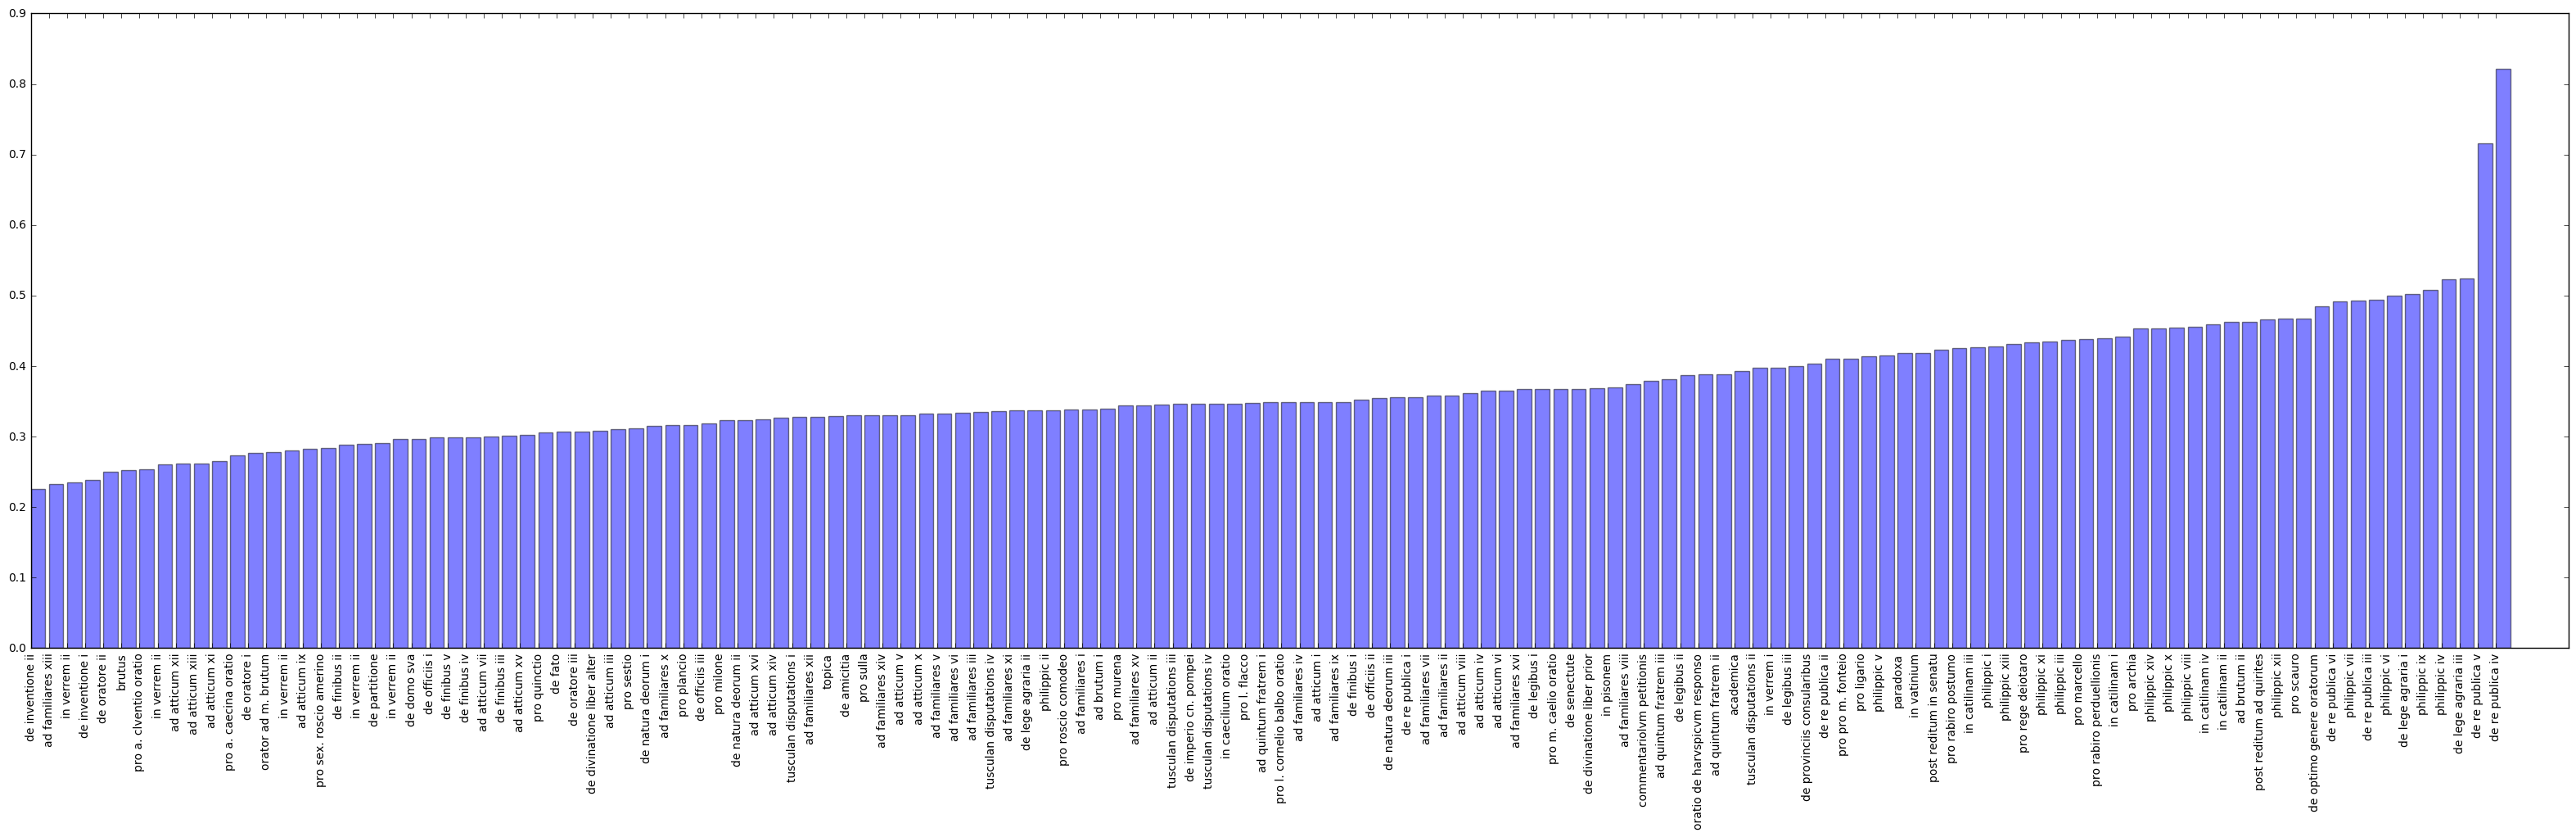

In [122]:
objects = [item[0] for item in lexdivs]
scores = [item[1] for item in lexdivs]

print(min(scores))

y_pos = np.arange(len(objects))
plt.figure(figsize=(40,10))
plt.bar(y_pos, scores, alpha=.5)
plt.xticks(y_pos, objects)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


plt.show()

In [112]:
from collections import Counter
c = list(Counter(lexdivs_tokens[0]).items())
#print(c)

print(sum([item[1] for item in c])/len(c))

2.5449101796407185


8.518604266068955


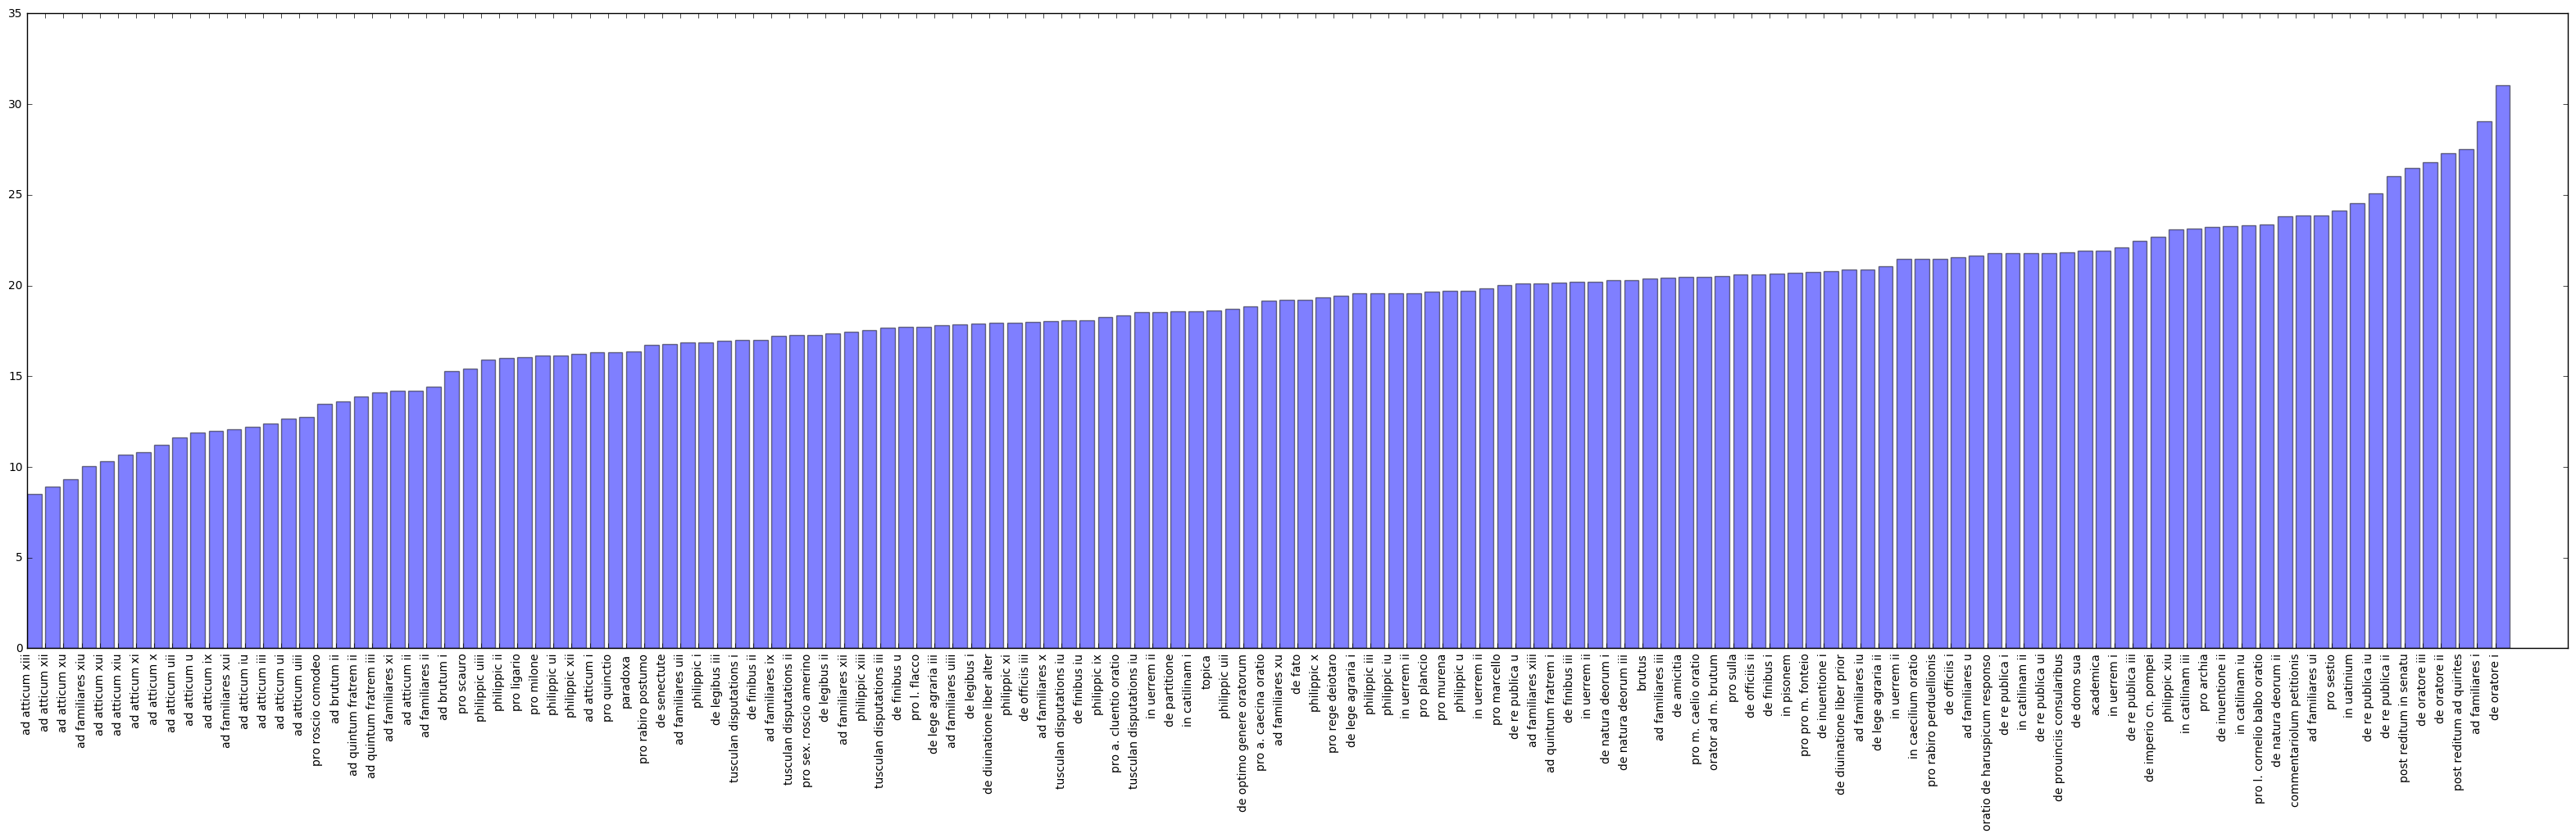

In [34]:
objects = [item[0] for item in aris]
scores = [item[1] for item in aris]


print(min(scores))

y_pos = np.arange(len(objects))
plt.figure(figsize=(40,10))
plt.bar(y_pos, scores, alpha=.5)
plt.xticks(y_pos, objects)

locs, labels = plt.xticks()
plt.setp(labels, rotation=90)


plt.show()